In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('../data/dataframe.csv',index_col=0, parse_dates=['Date'])
weather = pd.read_csv('../data/clean_weather.csv', index_col=0)
train = pd.read_csv('../data/train_clean.csv',  index_col=0)

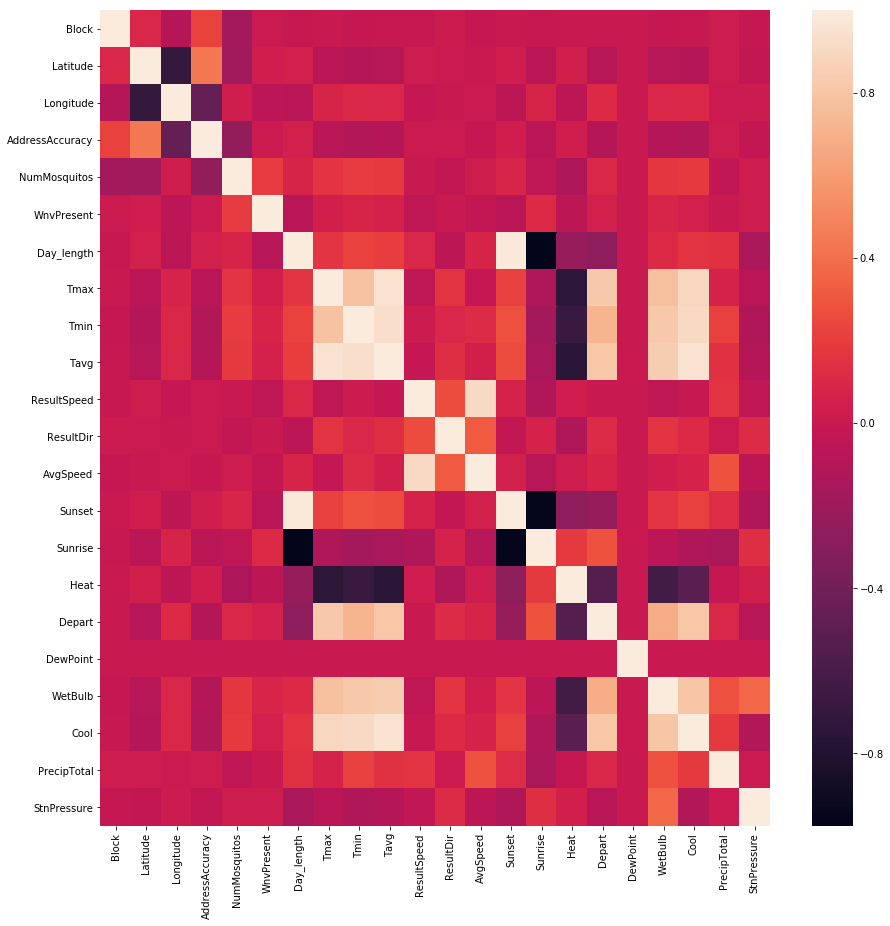

In [76]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [77]:
df.columns

Index(['Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Day_length', 'Tmax', 'Tmin', 'Tavg',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Sunset', 'Sunrise', 'Heat',
       'Depart', 'DewPoint', 'WetBulb', 'Cool', 'CodeSum', 'PrecipTotal',
       'StnPressure'],
      dtype='object')

In [78]:
grouped_traps = df.groupby(['Date','Trap','Species'])[['NumMosquitos', 'WnvPresent']].sum()

In [79]:
flat_groups = grouped_traps.reset_index().set_index('Date')

In [80]:
flat_groups['WnvPresent'] = flat_groups['WnvPresent'].map(lambda x: int(x > 0))

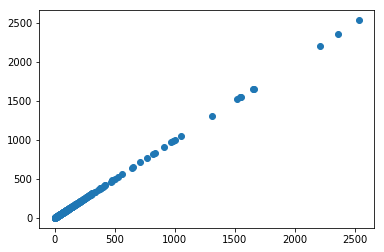

In [81]:
plt.scatter(flat_groups.NumMosquitos.value_counts().index, flat_groups.NumMosquitos.value_counts().index)

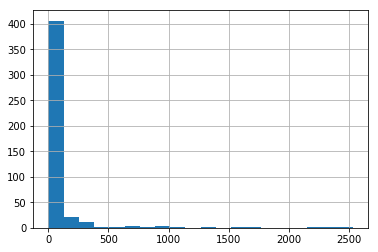

In [82]:
flat_groups[flat_groups['WnvPresent']==1].NumMosquitos.hist(bins=20)

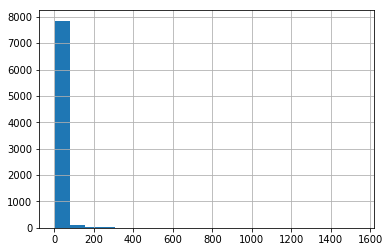

In [83]:
flat_groups[flat_groups['WnvPresent']==0].NumMosquitos.hist(bins=20)

In [84]:
df2 = pd.merge(flat_groups, df[['Day_length','Tmax','Tmin', 'Tavg',
       'ResultSpeed','ResultDir', 'AvgSpeed','Sunset',
       'Sunrise', 'Heat', 'Depart', 'DewPoint', 'WetBulb', 'Cool', 'CodeSum',
       'PrecipTotal', 'StnPressure']].drop_duplicates(), how='left', left_index=True, right_index=True)

In [85]:
df2['Date'] = df2.index

In [86]:
df3 = pd.merge(df2, df[['Latitude', 'Longitude', 'Trap']].drop_duplicates(), how='left', on='Trap')

In [87]:
df3.shape

(8643, 24)

In [88]:
df3.head()

,Trap,Species,NumMosquitos,WnvPresent,Day_length,Tmax,Tmin,Tavg,ResultSpeed,ResultDir,...,Depart,DewPoint,WetBulb,Cool,CodeSum,PrecipTotal,StnPressure,Date,Latitude,Longitude
0,T002,CULEX PIPIENS/RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.954690,-87.800991
1,T002,CULEX RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.954690,-87.800991
2,T007,CULEX RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.994991,-87.769279
3,T015,CULEX PIPIENS/RESTUANS,1,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.974089,-87.824812
4,T015,CULEX RESTUANS,4,0,53760,88.0,62.5,75.5,5.8,17.0,...,10,53.45788,65.5,10.5,BR HZ,0.0,29.415,2007-05-29,41.974089,-87.824812


In [89]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8643 entries, 0 to 8642
Data columns (total 24 columns):
Trap            8643 non-null object
Species         8643 non-null object
NumMosquitos    8643 non-null int64
WnvPresent      8643 non-null int64
Day_length      8643 non-null int64
Tmax            8643 non-null float64
Tmin            8643 non-null float64
Tavg            8643 non-null float64
ResultSpeed     8643 non-null float64
ResultDir       8643 non-null float64
AvgSpeed        8643 non-null float64
Sunset          8643 non-null int64
Sunrise         8643 non-null int64
Heat            8643 non-null float64
Depart          8643 non-null int64
DewPoint        8643 non-null float64
WetBulb         8643 non-null float64
Cool            8643 non-null float64
CodeSum         8643 non-null object
PrecipTotal     8643 non-null float64
StnPressure     8643 non-null float64
Date            8643 non-null datetime64[ns]
Latitude        8643 non-null float64
Longitude       8643 non-nu

In [90]:
df3['Month'] = df3['Date'].map(lambda x: x.month)

In [92]:
df3.to_csv('../data/final_dataframe.csv')